In [18]:
# utilities
import numpy as np
import pandas as pd
import string
import os
from collections import Counter

# plotting utilties
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE utilities
import imblearn
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from imblearn.over_sampling import SMOTE

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Set file path
file_path = base_path + '\\EmotionLabelled\\'

In [20]:
# Read the data set
df = pd.read_csv(file_path + 'tweets_emotion_labelled.csv')

print(df.head())
# Check for null values - needs to be zero
null_values = np.sum(df.isnull().any(axis=1))
print('----------------------')
print(f'Total Null values: {null_values}')
print('----------------------')

df1 = df.dropna()
null_values = np.sum(df1.isnull().any(axis=1))
print('----------------------------------------------')
print(f'Total Null values after dropping null rows: {null_values}')
print('----------------------------------------------')

# Some information about the data set
print('Length of data set: ', len(df1))
print('Shape of data set: ', df1.shape)
print('Dataset information')
print('-------------------')
df1.info()


   id                       date  \
0   2  2022-09-09 03:04:00+00:00   
1   3  2022-09-09 02:15:19+00:00   
2   4  2022-09-08 23:45:04+00:00   
3   5  2022-09-08 19:12:20+00:00   
4   6  2022-09-08 17:48:43+00:00   

                                             content  Emotion  
0  posted reposted from may they rest peace and p...      5.0  
1  reporting today with for the death queen eliza...      3.0  
2  the choir practicing tonight for longplanned m...      3.0  
3             rip your royal majesty toronto ontario      7.0  
4  the flags are being lowered half mast after th...      0.0  
----------------------
Total Null values: 20
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  4042
Shape of data set:  (4042, 4)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 4061
Data columns (total 4

Text(0.5, 0, 'Emotion Types')

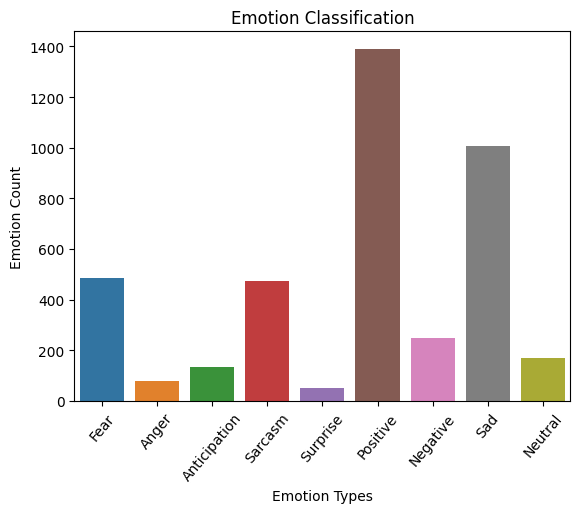

In [21]:
# Plotting the distribution for dataset.

ax = sns.countplot(x='Emotion', data=df)
ax.set_xticklabels(['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'], rotation=50)
plt.title("Emotion Classification")
plt.ylabel("Emotion Count")
plt.xlabel("Emotion Types")

In [22]:
# Split input and output elements
X = df1['content']
y = df1['Emotion']

# Splitting data as train/test - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print('Shape of train data', X_train.shape)
print('Shape of train data', X_test.shape)

Shape of train data (3233,)
Shape of train data (809,)


In [23]:
# Vectorize the data set (TF-IDF)

vectoriser = TfidfVectorizer(max_features=50000, analyzer='word',ngram_range=(1,3))
X_train_vect = vectoriser.fit_transform(X_train.astype('U'))
X_val_vect = vectoriser.fit_transform(X_test.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  23073


In [24]:
# summarize emotions classes to determine minority classes
counter = Counter(y)

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

Class=0, n=485 (11.999%)
Class=1, n=79 (1.954%)
Class=2, n=136 (3.365%)
Class=3, n=473 (11.702%)
Class=4, n=53 (1.311%)
Class=5, n=1390 (34.389%)
Class=6, n=249 (6.160%)
Class=7, n=1007 (24.913%)
Class=10, n=170 (4.206%)


In [25]:
counter = Counter(y_train)
print('--------------------')
print('Before oversampling')
print('--------------------')
print(counter)
print('--------------------')

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

--------------------
Before oversampling
--------------------
Counter({5.0: 1120, 7.0: 803, 0.0: 383, 3.0: 381, 6.0: 197, 10.0: 135, 2.0: 108, 1.0: 62, 4.0: 44})
--------------------
Class=0, n=383 (11.847%)
Class=1, n=62 (1.918%)
Class=2, n=108 (3.341%)
Class=3, n=381 (11.785%)
Class=4, n=44 (1.361%)
Class=5, n=1120 (34.643%)
Class=6, n=197 (6.093%)
Class=7, n=803 (24.838%)
Class=10, n=135 (4.176%)


In [26]:
# SMOTE + ENN - hypbrid technique (oversampling + undersampling) - train data set
smote_enn = SMOTEENN()
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train_vect, y_train)

counter_smote = Counter(y_train_smote)
print('--------------------------------')
print('After SMOTE + ENN oversampling')
print('--------------------------------')

for emotion_type, emotion_count in sorted(counter_smote.items()):
	percentage = emotion_count / len(y_train_smote) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))


--------------------------------
After SMOTE + ENN oversampling
--------------------------------
Class=0, n=772 (10.092%)
Class=1, n=1120 (14.641%)
Class=2, n=1116 (14.588%)
Class=3, n=749 (9.791%)
Class=4, n=1120 (14.641%)
Class=5, n=198 (2.588%)
Class=6, n=1080 (14.118%)
Class=7, n=375 (4.902%)
Class=10, n=1120 (14.641%)
